# Exploratory Data Analysis

This notebook is for performing analysis on car data scraped from an online car portal

The data is stored in a local MongoDB database <br>
The goal is to explore each feature of a car and observe how each affects the pricing of a car in Ghana

## Importing standard libraries

In [382]:
#Python data analysis imports
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [384]:
#object for connecting to local MongoDB
from pymongo import MongoClient
db_client = MongoClient()

#### Connecting to database and fetching data

In [385]:
data = pd.DataFrame(list(db_client.web_scraping_db.cars_collection.find()))

.shape method to show the number of rows and columns

In [386]:
data.shape

(1207, 14)

head() to view the first 5 rows

In [387]:
data.head()

,_id,Listing,Price,Condition:,Brand:,Model:,Trim / Edition:,Model year:,Transmission:,Body type:,Fuel type:,Mileage:,Engine capacity:,URL
0,5ef7879be1a9534c47aae29b,Kia Optima Full Option 2012,"GH₵ 39,500",Used,Kia,Optima,Full Option,2012,Automatic,Saloon,Petrol,"64,683 km",2.4 Liter,http://tonaton.com/en/ad/kia-optima-full-optio...
1,5ef7879ee1a9534c47aae29c,Mercedes Cclass 2006,"GH₵ 25,000",Used,Mercedes,Cclass,NaN,2006,Automatic,Saloon,Petrol,"98,124 km",1.8 Liter,http://tonaton.com/en/ad/mercedes-cclass-2006-...
2,5ef787afe1a9534c47aae29d,Toyota Corolla 2015,"GH₵ 42,500",Used,Toyota,Corolla,NaN,2015,Automatic,NaN,Petrol,"51,410 km",1.8 Liter,http://tonaton.com/en/ad/toyota-corolla-2015-f...
3,5ef787b2e1a9534c47aae29e,Toyota Corolla Auto 2010,"GH₵ 28,500",Used,Toyota,Corolla,Auto,2010,Automatic,Saloon,Petrol,"76,552 km",1.8 Liter,http://tonaton.com/en/ad/toyota-corolla-auto-2...
4,5ef787b6e1a9534c47aae29f,Chevrolet Cruze . 2014,"GH₵ 26,500",Used,Chevrolet,Cruze,.,2014,Automatic,Saloon,Petrol,"86,995 km",1.4 Liter,http://tonaton.com/en/ad/chevrolet-cruze-2014-...


Pandas describe method generates descriptive statistics that include information that summarizes the central tendency, 
dispersion, and shape of a dataset’s distribution, excluding NaN values.

In [388]:
data.describe()

,_id,Listing,Price,Condition:,Brand:,Model:,Trim / Edition:,Model year:,Transmission:,Body type:,Fuel type:,Mileage:,Engine capacity:,URL
count,1207,1207,1207,1207,1207,1207,722,1207,1207,1165,1207,1207,1207,1207
unique,1207,921,306,2,38,166,313,28,2,7,8,790,37,1126
top,5ef794c3e1a9534c47aae5f9,Toyota Land Cruiser 2019,"GH₵ 35,000",Used,Toyota,Corolla,SE,2014,Automatic,Saloon,Petrol,0 km,1.8 Liter,http://tonaton.com/en/ad/mitsubishi-mirage-201...
freq,1,11,30,1082,437,154,27,112,1123,599,1156,53,328,7


#### .info to give summary of data <br>
This method prints information about a DataFrame including the index data type and column data types, non-null values and memory usage.

In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 14 columns):
_id                  1207 non-null object
Listing              1207 non-null object
Price                1207 non-null object
Condition:           1207 non-null object
Brand:               1207 non-null object
Model:               1207 non-null object
Trim / Edition:      722 non-null object
Model year:          1207 non-null object
Transmission:        1207 non-null object
Body type:           1165 non-null object
Fuel type:           1207 non-null object
Mileage:             1207 non-null object
Engine capacity:     1207 non-null object
URL                  1207 non-null object
dtypes: object(14)
memory usage: 132.1+ KB


##### Observations: 

* Price, Mileage and Engine Capacity have object data types
* Trim/Edition has 485 null values 
* Body type has 42 null values

## Cleaning data
Generally this entails, dealing with null values, duplicates, converting to appropriate data types, etc

#### a. Renaming columns

In [390]:
data.rename(columns={'Price':'Price(GH¢)', 'Condition: ':'Condition', 'Brand: ':'Brand', 'Model: ':'Model', 'Trim / Edition: ':'Trim/Edition', 'Model year: ':'Model year', 'Transmission: ':'Transmission','Body type: ':'Body type', 'Fuel type: ':'Fuel type','Mileage: ':'Mileage(km)', 'Engine capacity: ':"Engine capacity(L)"}, inplace=True)

In [391]:
data.columns

Index(['_id', 'Listing', 'Price(GH¢)', 'Condition', 'Brand', 'Model',
       'Trim/Edition', 'Model year', 'Transmission', 'Body type', 'Fuel type',
       'Mileage(km)', 'Engine capacity(L)', 'URL'],
      dtype='object')

#### b. Removing columns with too many null values

In [392]:
data['Trim/Edition'].head(30)

0            Full Option
1                    NaN
2                    NaN
3                   Auto
4                      .
5                    NaN
6                  Sport
7                    NaN
8                    NaN
9             2.4 liters
10                   NaN
11                 sedan
12           Spider auto
13                   NaN
14                   NaN
15                   NaN
16                   NaN
17                   NaN
18                     ,
19                   NaN
20          Fully Loaded
21                  Reno
22               Limited
23                   NaN
24                   GDI
25               Limited
26                   XLE
27                   NaN
28    Limited( 7 seater)
29                    se
Name: Trim/Edition, dtype: object

In [393]:
data['Trim/Edition'].isnull().sum()

485

A closer look at the Trim/Edition reveals that there are a lot of null values and will not be useful for analysis <br>
Hence, I will drop the Trim/Edition column

In [394]:
data.drop(columns = ['Trim/Edition'], inplace=True)

#### c. Removing redundant variables

Drop the _id (autogenerated by MongoDB) and URL(not useful)

In [395]:
data.drop(columns = ['_id', 'URL'], inplace=True)

In [396]:
data.head()

,Listing,Price(GH¢),Condition,Brand,Model,Model year,Transmission,Body type,Fuel type,Mileage(km),Engine capacity(L)
0,Kia Optima Full Option 2012,"GH₵ 39,500",Used,Kia,Optima,2012,Automatic,Saloon,Petrol,"64,683 km",2.4 Liter
1,Mercedes Cclass 2006,"GH₵ 25,000",Used,Mercedes,Cclass,2006,Automatic,Saloon,Petrol,"98,124 km",1.8 Liter
2,Toyota Corolla 2015,"GH₵ 42,500",Used,Toyota,Corolla,2015,Automatic,NaN,Petrol,"51,410 km",1.8 Liter
3,Toyota Corolla Auto 2010,"GH₵ 28,500",Used,Toyota,Corolla,2010,Automatic,Saloon,Petrol,"76,552 km",1.8 Liter
4,Chevrolet Cruze . 2014,"GH₵ 26,500",Used,Chevrolet,Cruze,2014,Automatic,Saloon,Petrol,"86,995 km",1.4 Liter


#### d. Null Values

In [397]:
data.isnull().sum()

Listing                0
Price(GH¢)             0
Condition              0
Brand                  0
Model                  0
Model year             0
Transmission           0
Body type             42
Fuel type              0
Mileage(km)            0
Engine capacity(L)     0
dtype: int64

Body type has 42 nulls, however, I will not want to drop the rows altogether because it contains valuable data for analysis <br>
It will be difficult to impute also since the values will vary for each record and it will be nearly impossible to fill it in

In [398]:
data['Body type'].value_counts()

Saloon          599
SUV / 4x4       363
Hatchback       182
Estate           10
MPV               5
Convertible       3
Coupé/Sports      3
Name: Body type, dtype: int64

#### e. Duplicates

In [399]:
data[data.duplicated()]

,Listing,Price(GH¢),Condition,Brand,Model,Model year,Transmission,Body type,Fuel type,Mileage(km),Engine capacity(L)
37,Kia Sportage EX 2018,"GH₵ 120,000",Used,Kia,Sportage,2018,Automatic,SUV / 4x4,Petrol,"19,672 km",2.0 Liter
38,"Ford Explorer , 2006","GH₵ 48,000",Used,Ford,Explorer,2006,Automatic,SUV / 4x4,Petrol,"193,040 km",2.0 Liter
39,Toyota Corolla 2017,"GH₵ 69,500",New,Toyota,Corolla,2017,Automatic,Saloon,Petrol,"38,321 km",1.8 Liter
63,Mitsubishi Mirage 2015,"GH₵ 38,000",Used,Mitsubishi,Mirage,2015,Automatic,Hatchback,Petrol,"71,849 km",1.2 Liter
64,Toyota Camry 2009,"GH₵ 35,000",Used,Toyota,Camry,2009,Automatic,NaN,Petrol,"160,651 km",2.4 Liter
...,...,...,...,...,...,...,...,...,...,...,...
1117,"Volkswagen Passat , 2003","GH₵ 16,000",Used,Volkswagen,Passat,2003,Automatic,Saloon,Petrol,"71,000 km",1.8 Liter
1142,Toyota Corolla Limited Edition 2010,"GH₵ 38,500",Used,Toyota,Corolla,2010,Automatic,Saloon,Petrol,"45,280 km",1.8 Liter
1143,Honda Civic Fully loaded 2015,"GH₵ 58,500",Used,Honda,Civic,2015,Automatic,Saloon,Petrol,"46,824 km",1.8 Liter
1169,Hyundai Elantra S 2013,"GH₵ 45,000",Used,Hyundai,Elantra,2013,Manual,Saloon,Petrol,"36,000 km",1.8 Liter


In [400]:
data.drop_duplicates(keep='first', inplace=True)

In [401]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 1206
Data columns (total 11 columns):
Listing               1116 non-null object
Price(GH¢)            1116 non-null object
Condition             1116 non-null object
Brand                 1116 non-null object
Model                 1116 non-null object
Model year            1116 non-null object
Transmission          1116 non-null object
Body type             1077 non-null object
Fuel type             1116 non-null object
Mileage(km)           1116 non-null object
Engine capacity(L)    1116 non-null object
dtypes: object(11)
memory usage: 104.6+ KB


#### Converting values to numeric types

In [402]:
def get_figure(value, index):
    return value.split(" ")[index]

def comma(value):
    return int(value.replace(",", ""))

In [403]:
data['Price(GH¢)'] = data['Price(GH¢)'].apply(lambda x: get_figure(x, 1)).apply(lambda x: comma(x))

data['Mileage(km)'] = data['Mileage(km)'].apply(lambda x: get_figure(x, 0)).apply(lambda x: comma(x))

data['Engine capacity(L)'] = data['Engine capacity(L)'].apply(lambda x: get_figure(x, 0))

In [404]:
data['Engine capacity(L)'] = data['Engine capacity(L)'].astype('float')

In [405]:
#checking the data types after converting
print(data['Price(GH¢)'].dtype)

print(data['Mileage(km)'].dtype)

print(data['Engine capacity(L)'].dtype)

int64
int64
float64


In [406]:
data[['Price(GH¢)', 'Mileage(km)']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price(GH¢),1116.0,69779.270609,85355.747022,5500.0,27500.0,43500.0,78000.00,981750.0
Mileage(km),1116.0,69918.453405,81857.069767,0.0,32000.0,60001.0,87707.75,954642.0


In [407]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116 entries, 0 to 1206
Data columns (total 11 columns):
Listing               1116 non-null object
Price(GH¢)            1116 non-null int64
Condition             1116 non-null object
Brand                 1116 non-null object
Model                 1116 non-null object
Model year            1116 non-null object
Transmission          1116 non-null object
Body type             1077 non-null object
Fuel type             1116 non-null object
Mileage(km)           1116 non-null int64
Engine capacity(L)    1116 non-null float64
dtypes: float64(1), int64(2), object(8)
memory usage: 104.6+ KB


## Exploration
**Initial exploration of all variables in the dataset**

#### Brand

Text(0.5, 1.0, 'Top 10 Brands')

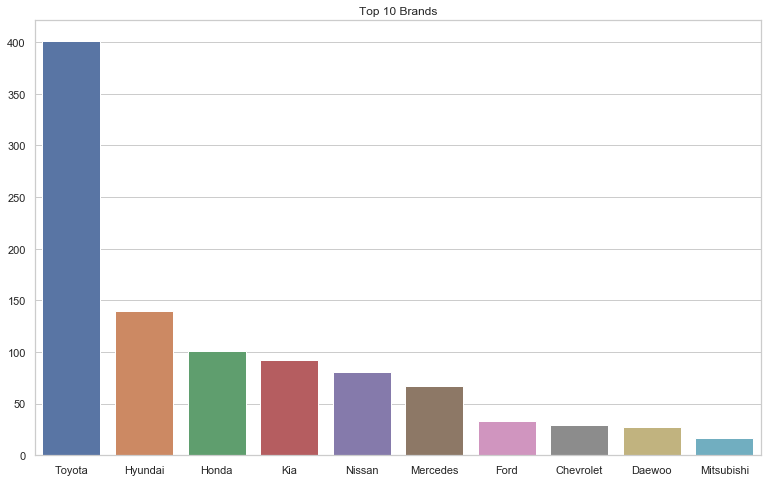

In [408]:
fig, ax = plt.subplots(figsize=(13, 8))
top10_brands = data['Brand'].value_counts()[:10]

sns.barplot(top10_brands.index, top10_brands.values)
sns.set(style='darkgrid')
plt.title("Top 10 Brands")

Above is a bar chart of the top 10 brands listed

#### Model year

In [409]:
data['Model year'] = data['Model year'].astype('int')

Text(0.5, 1.0, 'Count of cars per model year')

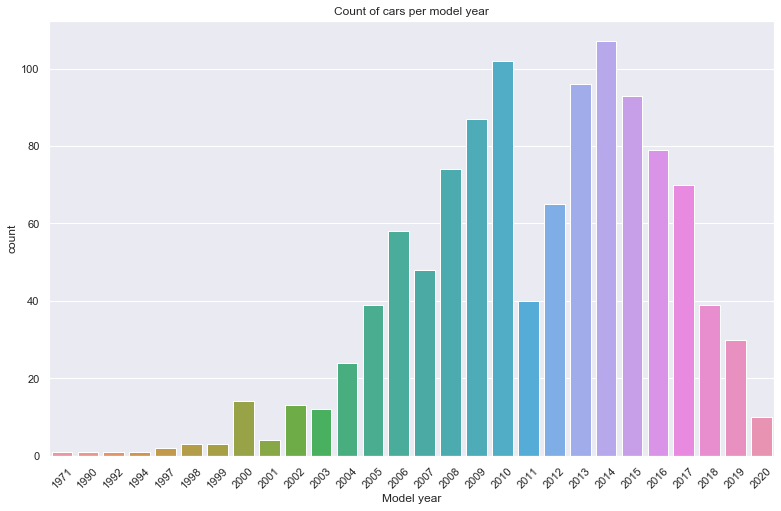

In [410]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.countplot(x='Model year', data=data)
plt.xticks(rotation=45)
plt.title("Count of cars per model year")

Above is a count of cars per model year
* Most cars listed were manufactured in 2010 and between 2013 and 2015
* There are some really old cars as well; from 1971 which may distort the data so will be dropped

In [411]:
 data = data[data['Model year'] > 1971]

In [412]:
len(data)

1115

#### Transmission

In [413]:
data['Transmission'].value_counts()

Automatic    1038
Manual         77
Name: Transmission, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

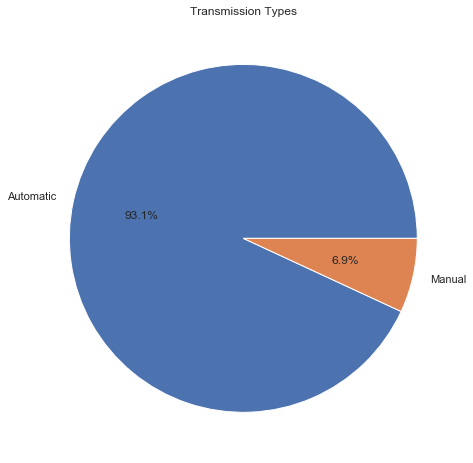

In [414]:
trans = data['Transmission'].value_counts()

fig, ax = plt.subplots(figsize=(13, 8))
plt.pie(trans.values, labels=trans.index, autopct='%1.1f%%')
plt.title("Transmission Types")


plt.xticks(rotation=45)

#### Body type

In [415]:
data['Body type'].value_counts()

Saloon          562
SUV / 4x4       333
Hatchback       161
Estate           10
MPV               4
Convertible       3
Coupé/Sports      3
Name: Body type, dtype: int64

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

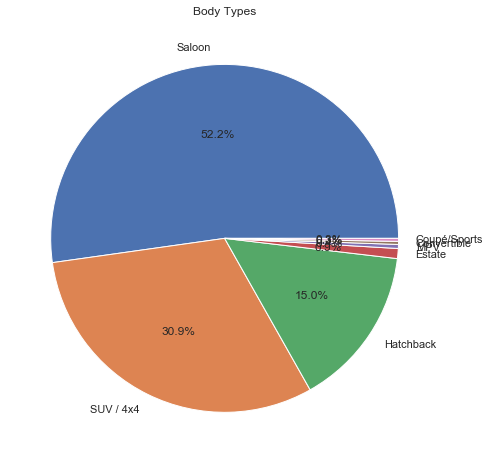

In [416]:
btype = data['Body type'].value_counts()

fig, ax = plt.subplots(figsize=(13, 8))
plt.pie(btype.values, labels=btype.index, autopct='%1.1f%%')
plt.title("Body Types")


plt.xticks(rotation=45)

**The body types with smaller percentages will be grouped into an 'Other' value**

In [417]:
def combine(val):
    if val in ['Estate', 'Coupé/Sports', 'MPV', 'Convertible']:
        val = 'Other'
    else:
        pass
    return val

In [418]:
data['Body type'] = data['Body type'].apply(lambda x: combine(x))

In [419]:
data['Body type'].value_counts()

Saloon       562
SUV / 4x4    333
Hatchback    161
Other         20
Name: Body type, dtype: int64

#### Fuel type

In [420]:
data['Fuel type'].describe()

count       1115
unique         8
top       Petrol
freq        1067
Name: Fuel type, dtype: object

In [421]:
data['Fuel type'].value_counts()

Petrol            1067
Diesel              41
Other                2
Petrol, Hybrid       1
Petrol, Other        1
CNG                  1
Hybrid               1
Diesel, Petrol       1
Name: Fuel type, dtype: int64

**Since there are very small values of other fuel types, it will be grouped into a value "Other"**

In [422]:
def combine(val):
    if val not in ['Petrol', 'Diesel']:
        val = 'Other'
    else:
        pass
    return val

In [423]:
data['Fuel type'] = data['Fuel type'].apply(lambda x: combine(x))

In [424]:
data['Fuel type'].value_counts()

Petrol    1067
Diesel      41
Other        7
Name: Fuel type, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

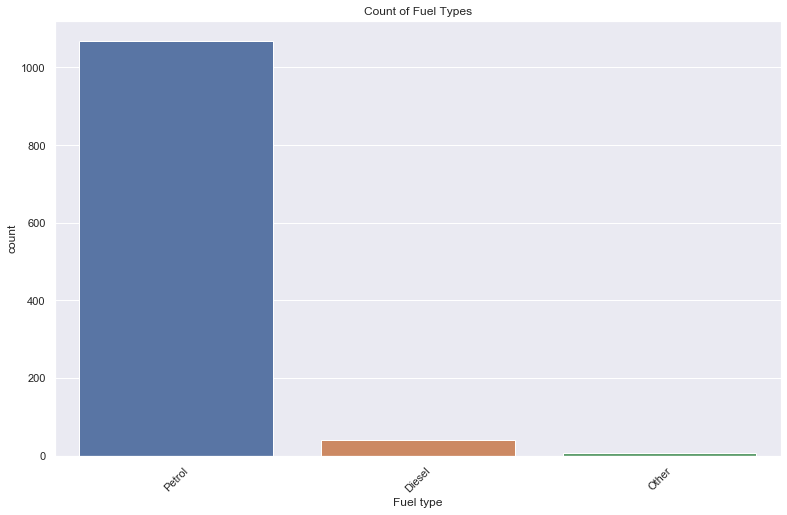

In [425]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.countplot(x='Fuel type', data=data)
plt.title("Count of Fuel Types")

plt.xticks(rotation=45)

#### Mileage

In [426]:
data['Mileage(km)'].describe()

count      1115.000000
mean      69967.491480
std       81877.400198
min           0.000000
25%       32000.000000
50%       60002.000000
75%       87765.500000
max      954642.000000
Name: Mileage(km), dtype: float64

Text(0.5, 1.0, 'Distribution of mileage in kilometers')

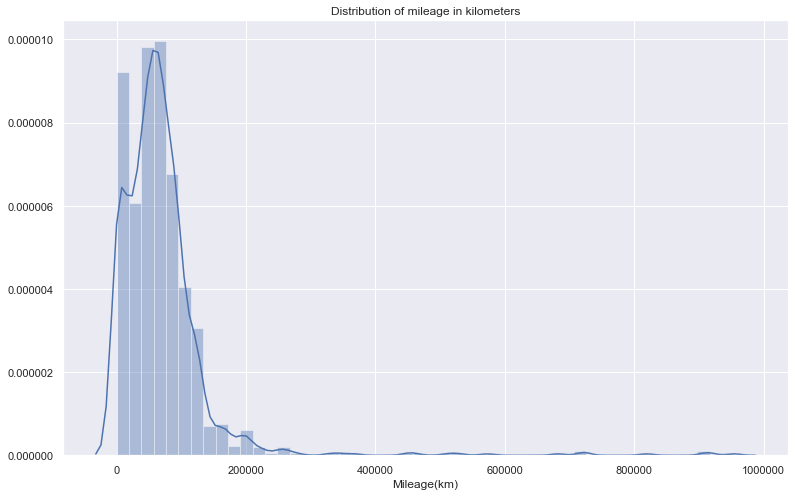

In [427]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.distplot(data['Mileage(km)'])
plt.title("Distribution of mileage in kilometers")

##### Observations:

* The average mileage is approximately 70,000km <br> 
* Very few cars have mileage greater than 200,000km <br>
* Mileage of 0km

Split the data into the two groups: cars with mileage below 300,000km and cars above 300,000km and investigate how it affects price

#### Mileage above 300,000km

In [428]:
g_mile = data[data['Mileage(km)'] > 300000]

In [429]:
g_mile['Price(GH¢)'].mean()

54739.2

Average price for cars with mileage above 300,000km is GH¢ 54,739

#### Mileage below 300,000km

In [430]:
l_mile = data[~(data['Mileage(km)'] > 300000)]

In [431]:
l_mile['Price(GH¢)'].mean()

69988.70727272728

Average price for cars with mileage below 300,000km is GH¢ 66,378

#### There is an inverse relationship between mileage and price. When the mileage is low, the price is high and vice versa

#### Exploring 0km mileage

In [432]:
len(data[data['Mileage(km)'] < 0])

0

In [433]:
data[data['Mileage(km)'] == 0]['Condition'].value_counts()

Used    29
New     13
Name: Condition, dtype: int64

##### Observation:

It is almost impossible to have a mileage of 0km because for a new car <br> Furthermore, more than half of these vehicles are used ones so the mileage data for these vehicles are false <br>
Therefore, I will delete the rows containing them

In [434]:
data = data[data['Mileage(km)'] > 0]

#### Engine Capacity

In [435]:
data['Engine capacity(L)'].describe()

count    1073.000000
mean        2.108947
std         0.709316
min         0.500000
25%         1.800000
50%         1.800000
75%         2.400000
max         6.000000
Name: Engine capacity(L), dtype: float64

Text(0.5, 1.0, 'Distribution of Engine Capacity in litres')

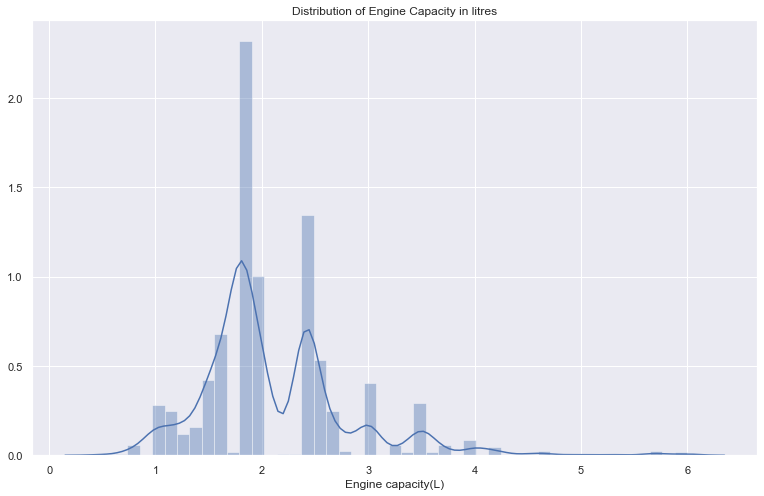

In [436]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.distplot(data['Engine capacity(L)'])
plt.title("Distribution of Engine Capacity in litres")

##### Observations: 

* Most cars have an engine capacity of 1.8 litres
* Engine capacities range from 0.5 to 6 litres

### Since this analysis focuses on the regular Ghanaian, further analysis will be conducted on which features affect cars that cost between GH¢40,000 and GH¢90,000

In [437]:
df = data[(data['Price(GH¢)'] > 40000) & (data['Price(GH¢)'] < 90000)]

In [438]:
df.head()

,Listing,Price(GH¢),Condition,Brand,Model,Model year,Transmission,Body type,Fuel type,Mileage(km),Engine capacity(L)
2,Toyota Corolla 2015,42500,Used,Toyota,Corolla,2015,Automatic,NaN,Petrol,51410,1.8
10,Hyundai Accent 2015,42000,Used,Hyundai,Accent,2015,Automatic,Saloon,Petrol,231,1.6
14,SEAT Exeo 2011,48000,New,SEAT,Exeo,2011,Automatic,NaN,Diesel,170,2.0
19,Toyota Land Cruiser 2006,60000,Used,Toyota,Land Cruiser,2006,Manual,SUV / 4x4,Diesel,194860,4.2
20,Nissan Qashqai Fully Loaded 2015,80000,Used,Nissan,Qashqai,2015,Automatic,SUV / 4x4,Petrol,51000,2.0


In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 2 to 1206
Data columns (total 11 columns):
Listing               372 non-null object
Price(GH¢)            372 non-null int64
Condition             372 non-null object
Brand                 372 non-null object
Model                 372 non-null object
Model year            372 non-null int32
Transmission          372 non-null object
Body type             360 non-null object
Fuel type             372 non-null object
Mileage(km)           372 non-null int64
Engine capacity(L)    372 non-null float64
dtypes: float64(1), int32(1), int64(2), object(7)
memory usage: 33.4+ KB


###  Exploring Price

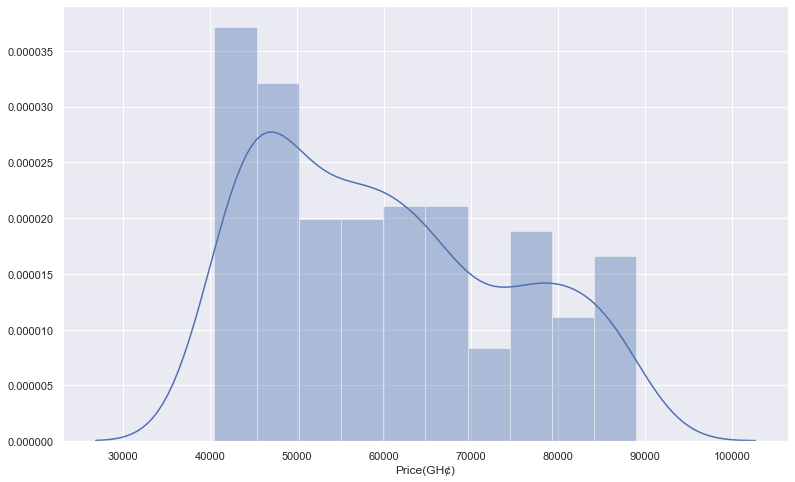

In [440]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.distplot(df['Price(GH¢)'], bins=10)

##### Observations:

* It is highly likely to purchase a car between 40,000 and 50,000 

In [441]:
df['Price(GH¢)'].describe()

count      372.000000
mean     60250.443548
std      14040.649444
min      40500.000000
25%      48000.000000
50%      58000.000000
75%      70250.000000
max      89000.000000
Name: Price(GH¢), dtype: float64

In [442]:
df['Price binned']=pd.cut(df['Price(GH¢)'], 3, labels=["Low", "Mid-range", "High"])

In [443]:
df['Price binned'].value_counts()

Low          174
Mid-range    111
High          87
Name: Price binned, dtype: int64

In [444]:
df.groupby('Price binned').mean()['Price(GH¢)']

Price binned
Low          47783.408046
Mid-range    63558.135135
High         80964.356322
Name: Price(GH¢), dtype: float64

### Brand vs Price

In [445]:
fig = px.box(df, x="Brand", y="Price(GH¢)", title='Relationship between each brand and price')
fig.show()

##### Observations:

* Most brands have their price between 45,000 and 80,000
* Toyota, Hyundai, Mercedes and Honda cost more than other brands

### Body type vs Price

In [446]:
fig = px.box(df, x="Body type", y="Price(GH¢)", title='Relationship between each body type and price')
fig.show()

##### Observations:

* Saloon cars and SUV/4x4 cost more (close to 90,000) than hatchbacks and other body types
* The bulk of saloon cars cost between 46,000 and 69,000
* The bulk of SUV/4x4 cars cost between 55,000 and 78,000

### Fuel type vs Price

In [447]:
fig = px.box(df, x="Fuel type", y="Price(GH¢)", title='Relationship between each fuel type and price')
fig.show()

##### Observations:

* Petrol cars have a wider range of prices than any other fuel type
* Petrol cars cost between 40,000 and 89,000, however the bulk cost from 47,000 and 70,000
* Most diesel cars cost between 48,000 and 82,000

### Condition vs Price

In [448]:
fig = px.box(df, x="Condition", y="Price(GH¢)", title='Relationship between each condition and price')
fig.show()

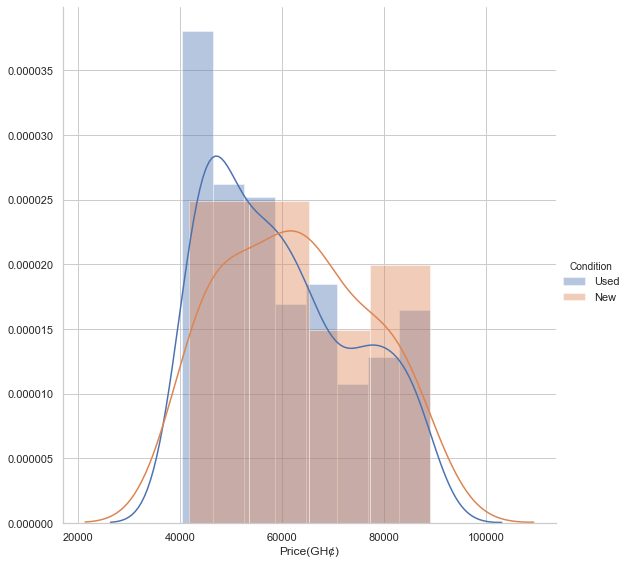

In [449]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Condition', size=8) \
    .map(sns.distplot, 'Price(GH¢)') \
    .add_legend()
plt.show()

##### Observations:

* Major overlapping can be observed
* Used cars are highly likely to be sold between 40,000 and 45,000
* New cars are likely to cost between 40,000 and 65,000

### Transmission vs Price

In [450]:
fig = px.box(df, x="Transmission", y="Price(GH¢)", title='Relationship between each transmission and price')
fig.show()

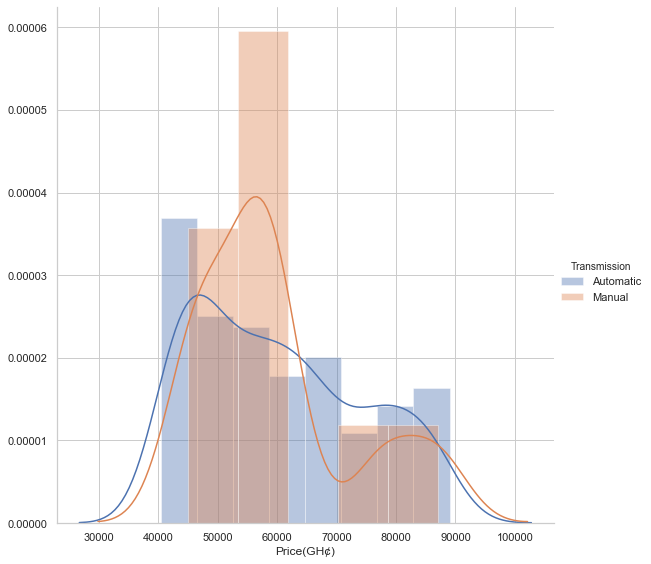

In [451]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='Transmission', size=8) \
    .map(sns.distplot, 'Price(GH¢)') \
    .add_legend()
plt.show()

##### Observations:

* Significant overlapping can be observed
* Manual cars are highly likely to be sold for 60,000
* Automatic cars are likely to be sold for less than 40,000

### Mileage vs Price

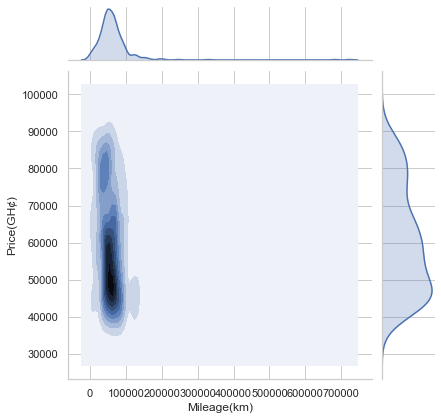

In [452]:
sns.jointplot(x='Mileage(km)', y='Price(GH¢)', data=df, kind='kde')
plt.show()

##### Observations:

* Of all cars that have mileage of less than 100,000km, most of them cost between GH¢45,000 and GH¢60,000

### Model year vs Price

(array([2002., 2004., 2006., 2008., 2010., 2012., 2014., 2016., 2018.,
        2020.]), <a list of 10 Text xticklabel objects>)

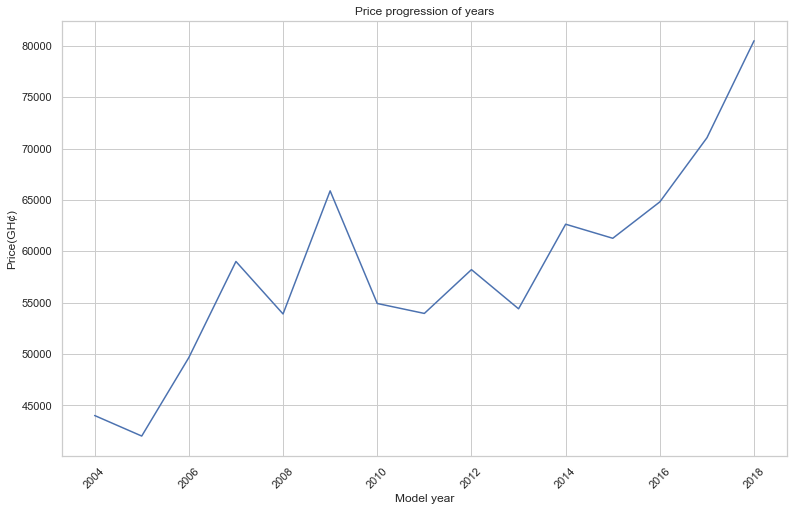

In [453]:
year_price = df.groupby('Model year').mean()['Price(GH¢)'].to_frame().reset_index().sort_values('Price(GH¢)', ascending=False)

fig, ax = plt.subplots(figsize=(13, 8))
sns.lineplot(x="Model year", y="Price(GH¢)", data=year_price)
plt.title("Price progression of years")
plt.xticks(rotation=45)

##### Observations:

* Price increases steadily with more modern cars
* The lowest price of car is from 2004 and the most expensive is from 2018

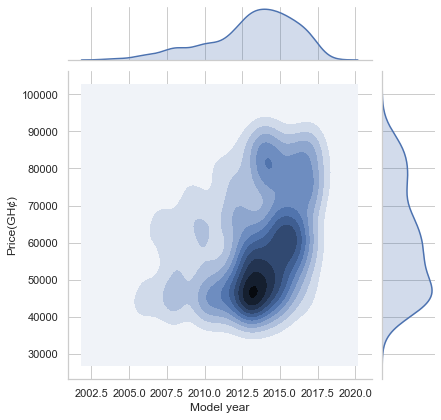

In [454]:
sns.jointplot(x='Model year', y='Price(GH¢)', data=df, kind='kde')
plt.show()

##### Observations:

* Most of the cars manufactured between 2012 and 2015 are likely to sold between 42,000 and 51,000

### Engine capacity vs Price

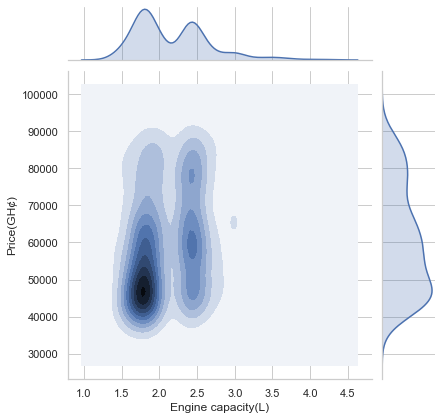

In [455]:
sns.jointplot(x='Engine capacity(L)', y='Price(GH¢)', data=df, kind='kde')
plt.show()

##### Observations:

* Most cars have engine capacity of 1.8 litres and cost about 46,000

## CONCLUSIONS:

1. Mileage has an inverse relationship with price. As mileage increases, price is lower

2. Most cars have an engine capacity of 1.8 litres. Very few cars have an engine capacity greater than 4 litres

3. Further analysis was conducted on cars that cost between GH¢40,000 and GH¢90,000. Hence the following conclusions are based on that:

* Toyota, Hyundai, Mercedes and Honda are more expensive than other brands

* Saloon and SUV/4x4 cars are more expensive and cost between GH¢46,000 and GH¢78,000

* Petrol cars cost as low as GH¢40,000 and as high as GH¢89,000

* Used cars are highly likely to be sold between GH¢40,000 and GH¢45,000
* New cars are likely to cost between GH¢40,000 and GH¢65,000

* Manual cars are highly likely to be sold for GH¢60,000
* Automatic cars are likely to be sold for less than GH¢40,000

* Price has an inverse relaionship with model year. The "younger" the car, the greater the price